## 1. Data Processing

In [1]:
# import general libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sn
# import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

### import dataset

In [2]:
df = pd.read_csv('county_census_and_election_result.csv')
df.head()

,Year,County FIP Code,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,Average Age,Average Annual Total Family Income,Individuals Who Did Not Receive Foodstamps,Individuals Who Received Foodstamps,Females,Males,...,Not In The Labor Force,Unemployed,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7526 entries, 0 to 7525
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        7526 non-null   int64  
 1   County FIP Code                             7526 non-null   int64  
 2   Average Annual Income of Individuals        7526 non-null   float64
 3   Average Amount Of Mortgage Payments         7526 non-null   float64
 4   Average Age                                 7526 non-null   float64
 5   Average Annual Total Family Income          7526 non-null   float64
 6   Individuals Who Did Not Receive Foodstamps  7526 non-null   float64
 7   Individuals Who Received Foodstamps         7526 non-null   float64
 8   Females                                     7526 non-null   float64
 9   Males                                       7526 non-null   float64
 10   Widowed    

### check dataset dimension

In [4]:
print(f"The dimension of the dataset is: {df.shape}")

The dimension of the dataset is: (7526, 45)


1.1. Process Original Dataset

In [5]:
# select the rows in the dataset that have the voting labels (years 2008, 2012, 2016, 2020)
selected_df = df.loc[df['Year'].isin([2008, 2012, 2016, 2020])]

# reset index
selected_df = selected_df.reset_index(drop=True)

# view the dataset
selected_df

,Year,County FIP Code,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,Average Age,Average Annual Total Family Income,Individuals Who Did Not Receive Foodstamps,Individuals Who Received Foodstamps,Females,Males,...,Not In The Labor Force,Unemployed,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,41.6,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
2,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
3,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
4,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
1854,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
1855,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
1856,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


### check dataset dimension

In [6]:
print(f"The dimension of the dataset is: {selected_df.shape}")

The dimension of the dataset is: (1858, 45)


In [7]:
# Examine and replace missing values 
print(selected_df.isnull().values.any())

True


In [8]:
selected_df.columns

Index(['Year', 'County FIP Code', 'Average Annual Income of Individuals',
       'Average Amount Of Mortgage Payments', 'Average Age',
       'Average Annual Total Family Income',
       'Individuals Who Did Not Receive Foodstamps',
       'Individuals Who Received Foodstamps', 'Females', 'Males', ' Widowed',
       ' Never Married', ' Married Spouse Present', ' Divorced', ' Seperated',
       ' Married Spouse Absent', ' White', ' Black/African American',
       ' Other Race', ' Two major Races', ' Japanese', ' Other Asian',
       ' American Indian or Alaska Native', ' Chinese', ' Three or More Races',
       ' Citizen', ' Non-Citizen', ' Naturalized Citizen',
       ' English Is Spoken At Home', ' Another Language Is Spoken At Home',
       ' Some College or Bachelor Degree ', ' High School or Lower Education',
       ' Masters or Professional Certificate', ' Doctoral Degree', ' Employed',
       ' Not In The Labor Force', ' Unemployed', 'state_po', 'county_name',
       'democrat', 

Note: As we consider each row as a data point to our ML model, we will drop the categorical state names and abbreviation. We will also drop the all the number of votes labels except for "winner" columns (0 for democrats and 1 for republican). We don't concern other parties as they do not have a history of winning anyway.

Drop:

county_fips: as there is no correlation between fips and vote numbers.
state_po: as there is no correlation between state appreviation and vote numbers.
county_name: as there is no correlation between county names and vote numbers.
democrat: as we do classification task.
green: as we do classification task.
liberitarian: as we do classification task.
other: as we do classification task.
republican: as we do classification task.

In [9]:
# Feature selection
more_selected_df = selected_df.drop(columns=['County FIP Code', 'state_po', 'county_name', 'democrat',
                                             'green', 'liberitarian', 'other', 'republican'])

more_selected_df.head()

,Year,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,Average Age,Average Annual Total Family Income,Individuals Who Did Not Receive Foodstamps,Individuals Who Received Foodstamps,Females,Males,Widowed,...,English Is Spoken At Home,Another Language Is Spoken At Home,Some College or Bachelor Degree,High School or Lower Education,Masters or Professional Certificate,Doctoral Degree,Employed,Not In The Labor Force,Unemployed,winner
0,2008,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,NaN
1,2008,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,2008,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,2008,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,2008,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0


In [10]:
# fill the NaN with both forward and backward fills
more_selected_df = more_selected_df.fillna(method='ffill')
more_selected_df = more_selected_df.fillna(method='bfill')

In [11]:
# check if there is any NaN values
print(more_selected_df.isnull().values.any())

False


In [12]:
more_selected_df.head()

,Year,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,Average Age,Average Annual Total Family Income,Individuals Who Did Not Receive Foodstamps,Individuals Who Received Foodstamps,Females,Males,Widowed,...,English Is Spoken At Home,Another Language Is Spoken At Home,Some College or Bachelor Degree,High School or Lower Education,Masters or Professional Certificate,Doctoral Degree,Employed,Not In The Labor Force,Unemployed,winner
0,2008,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,1.0
1,2008,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,2008,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,2008,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,2008,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0


In [13]:
print(f"The dimension of the dataset is: {more_selected_df.shape}")

The dimension of the dataset is: (1858, 37)


In [14]:
# select rows with the years 2008, 2012, 2016 presidential election
df1 = more_selected_df.loc[more_selected_df['Year'].isin([2008, 2012, 2016])]

# Model-dev 4: Feature selection
df1 = df1.drop(columns=['Year'])

# reset index
df1 = df1.reset_index(drop=True)

# view the dataset
df1.head()

,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,Average Age,Average Annual Total Family Income,Individuals Who Did Not Receive Foodstamps,Individuals Who Received Foodstamps,Females,Males,Widowed,Never Married,...,English Is Spoken At Home,Another Language Is Spoken At Home,Some College or Bachelor Degree,High School or Lower Education,Masters or Professional Certificate,Doctoral Degree,Employed,Not In The Labor Force,Unemployed,winner
0,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,17.4,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,1.0
1,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,12.1,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,19.5,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,13.8,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,23.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0


In [15]:
# normalization + divide the dataset into input features and output labels
X_df1 = df1[list(df1.columns[:-1])]
y_df1 = df1['winner'].to_numpy().reshape(-1, 1)

In [16]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_df1 = X_scaler.fit_transform(X_df1)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_df1 = y_scaler.fit_transform(y_df1)

In [17]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.3, random_state=0)

1.3. Process The Dataset Of 2020 Election Year

In [18]:
# select rows with year 2020 presidential election
df2 = more_selected_df.loc[more_selected_df['Year'].isin([2020])]

# Model-dev 4: Feature selection
df2 = df2.drop(columns=['Year'])

# reset index
df2 = df2.reset_index(drop=True)

# view the dataset
df2.head()

,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,Average Age,Average Annual Total Family Income,Individuals Who Did Not Receive Foodstamps,Individuals Who Received Foodstamps,Females,Males,Widowed,Never Married,...,English Is Spoken At Home,Another Language Is Spoken At Home,Some College or Bachelor Degree,High School or Lower Education,Masters or Professional Certificate,Doctoral Degree,Employed,Not In The Labor Force,Unemployed,winner
0,22991.6,612.5,48.9,49458.4,87.9,12.1,51.7,48.3,8.8,23.4,...,95.7,4.3,45.7,45.8,7.6,0.9,48.7,48.8,2.5,1.0
1,30231.5,768.1,51.8,65765.1,93.7,6.3,51.6,48.4,9.5,15.9,...,97.0,3.0,49.9,37.9,10.6,1.6,47.5,51.1,1.4,1.0
2,19634.8,484.2,45.3,43477.4,84.2,15.8,56.0,44.0,8.8,27.8,...,96.5,3.5,41.7,49.6,7.9,0.8,46.9,47.6,5.5,1.0
3,19265.8,505.4,49.6,40778.3,85.0,15.0,53.0,47.0,12.0,18.8,...,95.2,4.8,44.7,48.7,6.2,0.5,48.8,49.0,2.2,1.0
4,28664.8,786.3,47.6,62251.4,86.6,13.4,54.2,45.8,8.1,29.4,...,95.9,4.1,50.3,36.6,11.4,1.6,52.5,43.9,3.6,0.0


In [19]:
print(f"The dimension of the dataset is: {df2.shape}")

The dimension of the dataset is: (478, 36)


In [20]:
# normalization + divide the dataset into input features and output labels
X_df2 = df2[list(df2.columns[:-1])]
y_df2 = df2['winner'].to_numpy().reshape(-1, 1)

In [21]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_df2 = X_scaler.fit_transform(X_df2)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_df2 = y_scaler.fit_transform(y_df2)

# 2. Machine Learning Modeling

## 2.1. Decision Tree With Gini Criterion

In [22]:
# create and train the model
clf1 = DecisionTreeClassifier(criterion='gini', splitter='best')

In [23]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# predict on validate set
y_test_pred = clf1.predict(X_test)

# predict on train set
y_train_pred = clf1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Training MSE = 0.000000
Validating MSE = 0.946860
Accuracy = 0.763285
F1 Score = 0.755000
Precision Score = 0.740196
Recall Score = 0.770408
ROC-AUC Score = 0.763644


## 2.2. Decision Tree With Entropy Criterion

In [25]:
# create and train the model
clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best')

In [26]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
# predict on validate set
y_test_pred = clf2.predict(X_test)

# predict on train set
y_train_pred = clf2.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Training MSE = 0.000000
Validating MSE = 1.043478
Accuracy = 0.739130
F1 Score = 0.730000
Precision Score = 0.715686
Recall Score = 0.744898
ROC-AUC Score = 0.739421


# 3. Test Trained Models With The 2020 Dataset

## 3.1. Decision Tree With Gini Criterion

In [28]:
clf1_pred_y_2020 = clf1.predict(X_df2)

accuracy = metrics.accuracy_score(y_df2, clf1_pred_y_2020)
f1 = metrics.f1_score(y_df2, clf1_pred_y_2020)
prec = metrics.precision_score(y_df2, clf1_pred_y_2020)
recall = metrics.recall_score(y_df2, clf1_pred_y_2020)
roc_auc = metrics.roc_auc_score(y_df2, clf1_pred_y_2020)

print("Testing MSE = %f" % metrics.mean_squared_error(y_df2, clf1_pred_y_2020))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Testing MSE = 1.280335
Accuracy = 0.679916
F1 Score = 0.654628
Precision Score = 0.700483
Recall Score = 0.614407
ROC-AUC Score = 0.679104


In [29]:
# count the vote each counties
demo_count1 = repu_count1 = 0

for n in clf1_pred_y_2020:
    if n == -1:
        demo_count1 += 1
    else:
        repu_count1 += 1

## 3.2. Decision Tree With Entropy Criterion

In [30]:
clf2_pred_y_2020 = clf2.predict(X_df2)

accuracy = metrics.accuracy_score(y_df2, clf2_pred_y_2020)
f1 = metrics.f1_score(y_df2, clf2_pred_y_2020)
prec = metrics.precision_score(y_df2, clf2_pred_y_2020)
recall = metrics.recall_score(y_df2, clf2_pred_y_2020)
roc_auc = metrics.roc_auc_score(y_df2, clf2_pred_y_2020)

print("Testing MSE = %f" % metrics.mean_squared_error(y_df2, clf2_pred_y_2020))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Testing MSE = 0.995816
Accuracy = 0.751046
F1 Score = 0.723898
Precision Score = 0.800000
Recall Score = 0.661017
ROC-AUC Score = 0.749930


In [31]:
# count the vote each counties
demo_count2 = repu_count2 = 0

for n in clf2_pred_y_2020:
    if n == -1:
        demo_count2 += 1
    else:
        repu_count2 += 1

# 4. Plot Performance Of 2 Decision Tree Models

Text(0.5, 1.0, 'Party Votes Counts in 2020 at Each County in the US - Decision Tree Models Prediction Comparison')

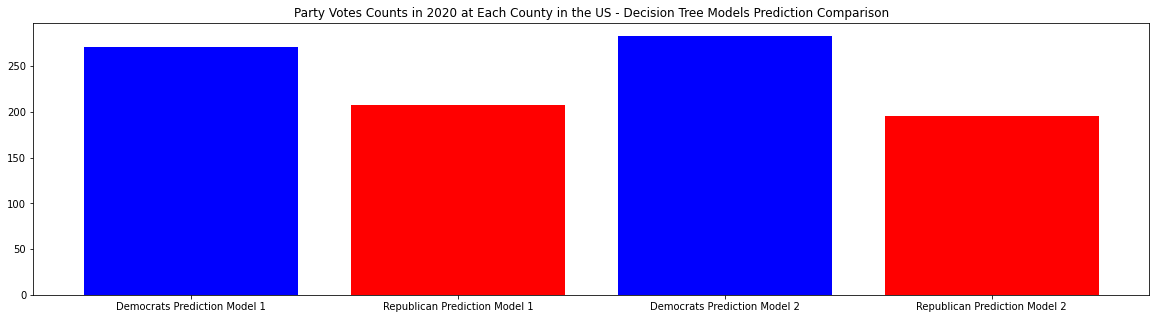

In [32]:
votes = [demo_count1, repu_count1, demo_count2, repu_count2]
names = ['Democrats Prediction Model 1', 'Republican Prediction Model 1', 
         'Democrats Prediction Model 2', 'Republican Prediction Model 2']

plt.figure(figsize=(20, 5))
plt.bar(names, votes, color=['blue', 'red', 'blue', 'red'])
plt.title('Party Votes Counts in 2020 at Each County in the US - Decision Tree Models Prediction Comparison')